In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from mongo import Mongo
import plotly.express as px
from FinMind.data import DataLoader
price_repo = Mongo(db='trading_bot', collection='stock_price')
month_revenue_repo = Mongo(db='trading_bot', collection='month_revenue')
balance_sheet_repo = Mongo(db='trading_bot', collection='balance_sheet')
income_sheet_repo = Mongo(db='trading_bot', collection='income_sheet')
cash_flow_repo = Mongo(db='trading_bot', collection='cash_flow')

# price_data = price_repo.get_data_by_stock_id('1101')
# price_data.dropna(axis=0, inplace=True)
# price_data = price_data[price_data['close']!=0]
# price_data
# month_revenue_data = month_revenue_repo.get_data_by_stock_id('1101')
# income_sheet = income_sheet_repo.get_data_by_stock_id('1101')
# balance_sheet = balance_sheet_repo.get_data_by_stock_id('1101')
# cash_flow = cash_flow_repo.get_data_by_stock_id('1101')
# all_price_data = price_repo.get_all_data()
# all_month_revenue_data = month_revenue_repo.get_all_data()
# all_income_sheet = income_sheet_repo.get_all_data()
# all_balance_sheet = balance_sheet_repo.get_all_data()
# all_cash_flow = cash_flow_repo.get_all_data()

dl = DataLoader()

price_data = dl.taiwan_stock_daily(stock_id='1101', start_date='2013-01-01')
price_data = price_data[price_data['close']!=0]

ImportError: cannot import name 'Mongo' from 'mongo' (/opt/homebrew/lib/python3.11/site-packages/mongo/__init__.py)

In [33]:
price_data.isnull().sum()
# no Nan in finmind original data

date                0
stock_id            0
Trading_Volume      0
Trading_money       0
open                0
max                 0
min                 0
close               0
spread              0
Trading_turnover    0
dtype: int64

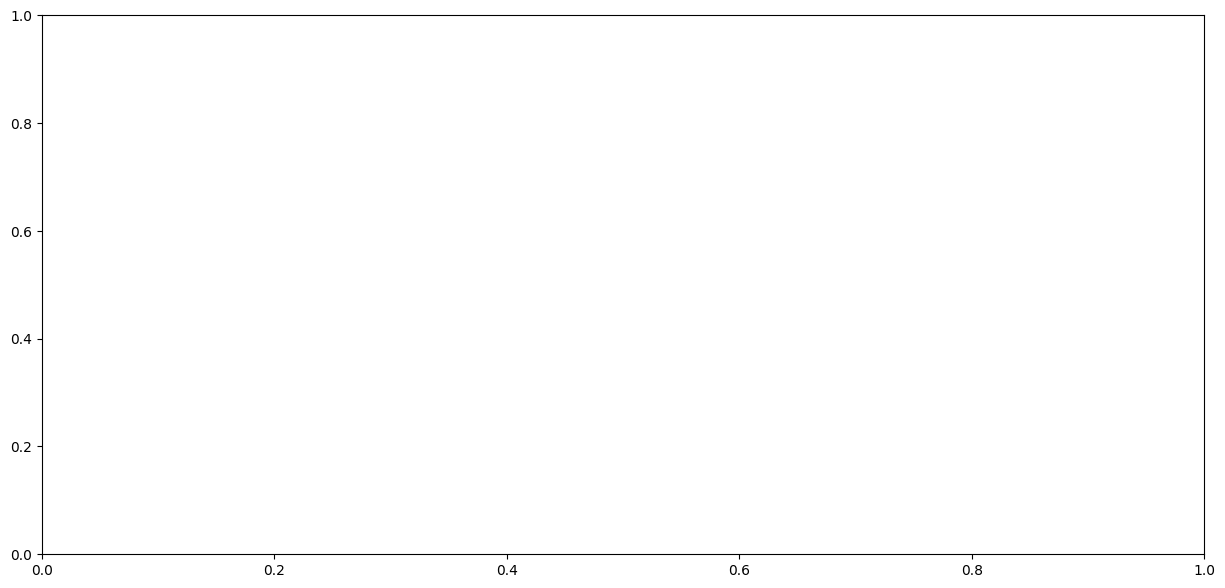

In [23]:
fig, ax = plt.subplots(figsize=(15,7))
sma30 = price_data['close'].rolling(30).mean()[29:]
sma30_std = price_data['close'].rolling(30).std()[29:]
upper_band = sma30+ 2*sma30_std
lower_band = sma30- 2*sma30_std
price = price_data['close'][29:]

# upper_band[:30].plot(ax=ax, color='black')
# lower_band[:30].plot(ax=ax, color='blue')
# sma30[:30].plot(ax=ax, color='orange')
# price[:30].plot(ax=ax, color='red')
# price_data['close'].rolling(30).mean()[120:200].plot(ax=ax, color='black')
# price_data['close'][120:200].plot(ax=ax, color='yellow')
# price_data['close'].rolling(120).mean()[120:200].plot(ax=ax, color='blue')
# upper_band.plot(ax=ax, color='black')
# lower_band.plot(ax=ax, color='blue')
# sma30.plot(ax=ax, color='orange')
# price.plot(ax=ax, color='red')
# Create a DataFrame to hold all series
df = pd.DataFrame({
    'Upper_Band': upper_band,
    'Lower_Band': lower_band,
    'SMA30': sma30,
    'Price': price
})

# Assuming upper_band, lower_band, and price are Pandas Series and indexed similarly
# Creating a DataFrame to hold all these series
df = pd.DataFrame({
    'Upper_Band': upper_band,
    'Lower_Band': lower_band,
    'Price': price
})

# Initialize variables to hold buy and sell signals
df['Buy_Signal'] = False
df['Sell_Signal'] = False

# Initialize variable to hold the state of the portfolio (whether we currently hold the stock or not)
in_position = False

# Loop through DataFrame and identify buy/sell opportunities
for i in range(0, len(df)+1):
    
    # Buy Signal: When price is lower than the lower band
    if df['Price'].iloc[i] < df['Lower_Band'].iloc[i] and  in_position !=True:
        df.at[i, 'Buy_Signal'] = True
        in_position = True  # Now you hold the stock
        
    # Sell Signal: When price is higher than the upper band
    if df['Price'].iloc[i] > df['Upper_Band'].iloc[i] and in_position == True:
        df.at[i, 'Sell_Signal'] = True
        in_position = False  # You have sold the stock

df.dropna(inplace=True)
# # Display DataFrame (Optional)
# print(df)

# Now, df['Buy_Signal'] will indicate where you should buy and df['Sell_Signal'] will indicate where you should sell
px.line(df[['Upper_Band','Lower_Band','Price']])




In [1]:

import pandas as pd
def bollinger_band(stock_id):
    dl = DataLoader()

    price_data = dl.taiwan_stock_daily(stock_id=str(stock_id), start_date='2013-01-01')
    price_data = price_data[price_data['close']!=0]

    #define initial capitial
    initial_capital = 10000.0
    final_capital = initial_capital


    baseline_return = (price_data['close'].iloc[-1] - price_data['close'].iloc[0]) * (10000/price_data['close'].iloc[0] )

    
    sma30 = price_data['close'].rolling(30).mean()[29:]
    sma30_std = price_data['close'].rolling(30).std()[29:]
    upper_band = sma30+ 3*sma30_std
    lower_band = sma30- 3*sma30_std
    price = price_data['close'][29:]

    #reset the index so that it start from 0
    sma30 = sma30.reset_index(drop=True)
    sma30_std = sma30_std.reset_index(drop=True)
    upper_band = upper_band.reset_index(drop=True)
    lower_band = lower_band.reset_index(drop=True)
    price = price.reset_index(drop=True)


    # Assuming upper_band, lower_band, and price are Pandas Series and indexed similarly
    # Creating a DataFrame to hold all these series
    df = pd.DataFrame({
        'Upper_Band': upper_band,
        'Lower_Band': lower_band,
        'Price': price
    })

    # Initialize variables to hold buy and sell signals
    df['Buy_Signal'] = False
    df['Sell_Signal'] = False
    # Initial capital
    initial_capital = 10000.0
    final_capital = initial_capital

    # Calculate the number of years
    time_period = len(price_data.index) / 365.25

    # Initialize variable to hold the state of the portfolio (whether we currently hold the stock or not)
    in_position = False

    # Loop through DataFrame and identify buy/sell opportunities
    for i in range(0, len(df)):
        
        # Buy Signal: When price is lower than the lower band
        if df['Price'].iloc[i] < df['Lower_Band'].iloc[i] and not in_position:
            df.at[i,'Buy_Signal'] = True
            in_position = True  # Now you hold the stock
            buy_price = df['Price'].iloc[i]  # Remember the buy price
            
        # Sell Signal: When price is higher than the upper band
        if df['Price'].iloc[i] > df['Upper_Band'].iloc[i] and in_position:
            df.at[i,'Sell_Signal'] = True
            in_position = False  # You have sold the stock
            
            # Calculate profit from this transaction and add it to the final capital
            sell_price = df['Price'].iloc[i]
            final_capital += (sell_price - buy_price) * (final_capital / buy_price)

    # Calculate annualized return
    annualized_return = ((final_capital / initial_capital) ** (1 / time_period) - 1) * 100
    
    baseline_annualized_return = ((baseline_return / initial_capital) ** (1 / time_period) - 1) * 100
    # Display the annualized return






    # Create a scatter plot for price
    fig = px.line(df, x=df.index, y='Price', title='Buy and Sell Signal Plot')

    # Add line plot for upper and lower bands
    fig.add_scatter(x=df.index, y=df['Upper_Band'], mode='lines', name='Upper Band')
    fig.add_scatter(x=df.index, y=df['Lower_Band'], mode='lines', name='Lower Band')

    # Filter out buy and sell signals from df
    buy_signals = df[df['Buy_Signal']]
    sell_signals = df[df['Sell_Signal']]

    # Add buy signals to the plot
    fig.add_scatter(x=buy_signals.index, y=buy_signals['Price'], mode='markers', marker=dict(size=10, color='green'), name='Buy Signal')

    # Add sell signals to the plot
    fig.add_scatter(x=sell_signals.index, y=sell_signals['Price'], mode='markers', marker=dict(size=10, color='red'), name='Sell Signal')

    # Show plot
    fig.show()

    #metircs
    print(f'Annualized Return: {annualized_return:.2f}%')
    print(f'initial_investment : {initial_capital}')
    print(f'final_investment : {final_capital}')
    print('----------------------------')
    print(f'baseline return (HODL) : {baseline_return}')
    print(f'baseline Annualized Return: {baseline_annualized_return:.2f}%')

In [2]:
bollinger_band('2330')

NameError: name 'DataLoader' is not defined

In [34]:

import pandas as pd
def bollinger_band(stock_id,numbers_of_standard_deviation=2, sma_period=30):

    dl = DataLoader()

    price_data = dl.taiwan_stock_daily(stock_id=str(stock_id), start_date='2013-01-01')
    price_data = price_data[price_data['close']!=0]

    #define initial capitial
    initial_capital = 10000.0
    final_capital = initial_capital


    baseline_return = (price_data['close'].iloc[-1] - price_data['close'].iloc[0]) * (10000/price_data['close'].iloc[0] )


    sma30 = price_data['close'].rolling(sma_period).mean()[sma_period-1:]
    sma30_std = price_data['close'].rolling(sma_period).std()[sma_period-1:]
    upper_band = sma30+ numbers_of_standard_deviation*sma30_std
    lower_band = sma30- numbers_of_standard_deviation*sma30_std
    price = price_data['close'][sma_period-1:]

    #reset the index so that it start from 0
    sma30 = sma30.reset_index(drop=True)
    sma30_std = sma30_std.reset_index(drop=True)
    upper_band = upper_band.reset_index(drop=True)
    lower_band = lower_band.reset_index(drop=True)
    price = price.reset_index(drop=True)


    # Assuming upper_band, lower_band, and price are Pandas Series and indexed similarly
    # Creating a DataFrame to hold all these series
    df = pd.DataFrame({
        'Upper_Band': upper_band,
        'Lower_Band': lower_band,
        'Price': price
    })

    # Initialize variables to hold buy and sell signals
    df['Buy_Signal'] = False
    df['Sell_Signal'] = False
    # Initial capital
    initial_capital = 10000.0
    final_capital = initial_capital

    # Calculate the number of years
    time_period = len(price_data.index) / 365.25

    # Initialize variable to hold the state of the portfolio (whether we currently hold the stock or not)
    in_position = False

    # Loop through DataFrame and identify buy/sell opportunities
    for i in range(0, len(df)):
        
        # Buy Signal: When price is lower than the lower band
        if df['Price'].iloc[i] < df['Lower_Band'].iloc[i] and not in_position:
            df.at[i,'Buy_Signal'] = True
            in_position = True  # Now you hold the stock
            buy_price = df['Price'].iloc[i]  # Remember the buy price
            
        # Sell Signal: When price is higher than the upper band
        if df['Price'].iloc[i] > df['Upper_Band'].iloc[i] and in_position:
            df.at[i,'Sell_Signal'] = True
            in_position = False  # You have sold the stock
            
            # Calculate profit from this transaction and add it to the final capital
            sell_price = df['Price'].iloc[i]
            final_capital += (sell_price - buy_price) * (final_capital / buy_price)

    # Calculate annualized return
    annualized_return = ((final_capital / initial_capital) ** (1 / time_period) - 1) * 100
    
    baseline_annualized_return = ((baseline_return / initial_capital) ** (1 / time_period) - 1) * 100
    # Display the annualized return






    # Create a scatter plot for price
    fig = px.line(df, x=df.index, y='Price', title='Buy and Sell Signal Plot')

    # Add line plot for upper and lower bands
    fig.add_scatter(x=df.index, y=df['Upper_Band'], mode='lines', name='Upper Band')
    fig.add_scatter(x=df.index, y=df['Lower_Band'], mode='lines', name='Lower Band')

    # Filter out buy and sell signals from df
    buy_signals = df[df['Buy_Signal']]
    sell_signals = df[df['Sell_Signal']]

    # Add buy signals to the plot
    fig.add_scatter(x=buy_signals.index, y=buy_signals['Price'], mode='markers', marker=dict(size=10, color='green'), name='Buy Signal')

    # Add sell signals to the plot
    fig.add_scatter(x=sell_signals.index, y=sell_signals['Price'], mode='markers', marker=dict(size=10, color='red'), name='Sell Signal')

    # Show plot
    fig.show()

    #metircs
    print(f'sma={sma_period}, std={numbers_of_standard_deviation}')
    print(f'Annualized Return: {annualized_return:.2f}%')
    print(f'initial_investment : {initial_capital}')
    print(f'final_investment : {final_capital}')
    print('----------------------------')
    print(f'baseline return (HODL) : {baseline_return}')
    print(f'baseline Annualized Return: {baseline_annualized_return:.2f}%')


In [35]:
def determining_the_best_sma_period_and_numbers_of_std(stock_id='2330'):
    sma_period = range(20, 120, 20)
    for std in range(1, 5):
        for sma in sma_period:
            bollinger_band(stock_id, numbers_of_standard_deviation=std, sma_period=sma)

            


determining_the_best_sma_period_and_numbers_of_std()

sma=20, std=1
Annualized Return: 14.25%
initial_investment : 10000.0
final_investment : 26358.205658920753
----------------------------
baseline return (HODL) : 47429.71887550201
baseline Annualized Return: 23.85%


sma=40, std=1
Annualized Return: 6.52%
initial_investment : 10000.0
final_investment : 15829.899719523246
----------------------------
baseline return (HODL) : 47429.71887550201
baseline Annualized Return: 23.85%


sma=60, std=1
Annualized Return: 9.14%
initial_investment : 10000.0
final_investment : 18894.4806327393
----------------------------
baseline return (HODL) : 47429.71887550201
baseline Annualized Return: 23.85%


sma=80, std=1
Annualized Return: 9.21%
initial_investment : 10000.0
final_investment : 18992.147208957693
----------------------------
baseline return (HODL) : 47429.71887550201
baseline Annualized Return: 23.85%


sma=100, std=1
Annualized Return: 8.61%
initial_investment : 10000.0
final_investment : 18245.878308954896
----------------------------
baseline return (HODL) : 47429.71887550201
baseline Annualized Return: 23.85%


sma=20, std=2
Annualized Return: 8.40%
initial_investment : 10000.0
final_investment : 17989.043007649056
----------------------------
baseline return (HODL) : 47429.71887550201
baseline Annualized Return: 23.85%


sma=40, std=2
Annualized Return: 11.27%
initial_investment : 10000.0
final_investment : 21745.19232345425
----------------------------
baseline return (HODL) : 47429.71887550201
baseline Annualized Return: 23.85%


sma=60, std=2
Annualized Return: 10.22%
initial_investment : 10000.0
final_investment : 20304.415366805006
----------------------------
baseline return (HODL) : 47429.71887550201
baseline Annualized Return: 23.85%


sma=80, std=2
Annualized Return: 7.79%
initial_investment : 10000.0
final_investment : 17261.086406378072
----------------------------
baseline return (HODL) : 47429.71887550201
baseline Annualized Return: 23.85%


sma=100, std=2
Annualized Return: 7.64%
initial_investment : 10000.0
final_investment : 17084.133924680213
----------------------------
baseline return (HODL) : 47429.71887550201
baseline Annualized Return: 23.85%


sma=20, std=3
Annualized Return: 6.53%
initial_investment : 10000.0
final_investment : 15847.843368904543
----------------------------
baseline return (HODL) : 47429.71887550201
baseline Annualized Return: 23.85%


sma=40, std=3
Annualized Return: 24.06%
initial_investment : 10000.0
final_investment : 48020.56896515763
----------------------------
baseline return (HODL) : 47429.71887550201
baseline Annualized Return: 23.85%


sma=60, std=3
Annualized Return: 17.76%
initial_investment : 10000.0
final_investment : 32865.48595128691
----------------------------
baseline return (HODL) : 47429.71887550201
baseline Annualized Return: 23.85%


sma=80, std=3
Annualized Return: 8.57%
initial_investment : 10000.0
final_investment : 18187.90785439107
----------------------------
baseline return (HODL) : 47429.71887550201
baseline Annualized Return: 23.85%


sma=100, std=3
Annualized Return: 12.35%
initial_investment : 10000.0
final_investment : 23338.198122291768
----------------------------
baseline return (HODL) : 47429.71887550201
baseline Annualized Return: 23.85%


sma=20, std=4
Annualized Return: 0.00%
initial_investment : 10000.0
final_investment : 10000.0
----------------------------
baseline return (HODL) : 47429.71887550201
baseline Annualized Return: 23.85%


sma=40, std=4
Annualized Return: 0.00%
initial_investment : 10000.0
final_investment : 10000.0
----------------------------
baseline return (HODL) : 47429.71887550201
baseline Annualized Return: 23.85%


sma=60, std=4
Annualized Return: 0.00%
initial_investment : 10000.0
final_investment : 10000.0
----------------------------
baseline return (HODL) : 47429.71887550201
baseline Annualized Return: 23.85%


sma=80, std=4
Annualized Return: 0.00%
initial_investment : 10000.0
final_investment : 10000.0
----------------------------
baseline return (HODL) : 47429.71887550201
baseline Annualized Return: 23.85%


sma=100, std=4
Annualized Return: 0.00%
initial_investment : 10000.0
final_investment : 10000.0
----------------------------
baseline return (HODL) : 47429.71887550201
baseline Annualized Return: 23.85%


sma=60 std=3, has the best result for 2330TSMC


In [ ]:

# import pandas as pd
# def bollinger_band(stock_id, optimise=False):
#     dl = DataLoader()

#     price_data = dl.taiwan_stock_daily(stock_id=str(stock_id), start_date='2013-01-01')
#     price_data = price_data[price_data['close']!=0]
    



#     if optimise:
#         for i in range(20, 100, 10):
#     else:
#         sma30 = price_data['close'].rolling(30).mean()[29:].reset_index(drop=True)
#         sma30_std = price_data['close'].rolling(30).std()[29:].reset_index(drop=True)
#         upper_band = sma30+ 2*sma30_std.reset_index(drop=True)
#         lower_band = sma30- 2*sma30_std.reset_index(drop=True)
#         price = price_data['close'][29:].reset_index(drop=True)


#     # Assuming upper_band, lower_band, and price are Pandas Series and indexed similarly
#     # Creating a DataFrame to hold all these series
#     df = pd.DataFrame({
#         'Upper_Band': upper_band,
#         'Lower_Band': lower_band,
#         'Price': price
#     })

#     # Initialize variables to hold buy and sell signals
#     df['Buy_Signal'] = False
#     df['Sell_Signal'] = False
#     # Initial capital
#     initial_capital = 10000.0
#     final_capital = initial_capital

#     # Calculate the number of years
#     time_period = 10#(price_data.index[-1] - price_data.index[0]).days / 365.25

#     # Initialize variable to hold the state of the portfolio (whether we currently hold the stock or not)
#     in_position = False

#     # Loop through DataFrame and identify buy/sell opportunities
#     for i in range(0, len(df)):
        
#         # Buy Signal: When price is lower than the lower band
#         if df['Price'].iloc[i] < df['Lower_Band'].iloc[i] and not in_position:
#             df.at[i,'Buy_Signal'] = True
#             in_position = True  # Now you hold the stock
#             buy_price = df['Price'].iloc[i]  # Remember the buy price
            
#         # Sell Signal: When price is higher than the upper band
#         if df['Price'].iloc[i] > df['Upper_Band'].iloc[i] and in_position:
#             df.at[i,'Sell_Signal'] = True
#             in_position = False  # You have sold the stock
            
#             # Calculate profit from this transaction and add it to the final capital
#             sell_price = df['Price'].iloc[i]
#             final_capital += (sell_price - buy_price) * (final_capital / buy_price)

#     # Calculate annualized return
#     annualized_return = ((final_capital / initial_capital) ** (1 / time_period) - 1) * 100

#     # Display the annualized return
#     print(f'Annualized Return: {annualized_return:.2f}%')






#     # Create a scatter plot for price
#     fig = px.line(df, x=df.index, y='Price', title='Buy and Sell Signal Plot')

#     # Add line plot for upper and lower bands
#     fig.add_scatter(x=df.index, y=df['Upper_Band'], mode='lines', name='Upper Band')
#     fig.add_scatter(x=df.index, y=df['Lower_Band'], mode='lines', name='Lower Band')

#     # Filter out buy and sell signals from df
#     buy_signals = df[df['Buy_Signal']]
#     sell_signals = df[df['Sell_Signal']]

#     # Add buy signals to the plot
#     fig.add_scatter(x=buy_signals.index, y=buy_signals['Price'], mode='markers', marker=dict(size=10, color='green'), name='Buy Signal')

#     # Add sell signals to the plot
#     fig.add_scatter(x=sell_signals.index, y=sell_signals['Price'], mode='markers', marker=dict(size=10, color='red'), name='Sell Signal')

#     # Show plot
#     fig.show()

#     print(f'initial_investment : {initial_capital}')
#     print(f'final_investment : {final_capital}')

In [59]:
df['Sell_Signal'].sum()

1

In [51]:
df.at[0,'Buy_Signal'] = True
df

Upper_Band  Lower_Band  Price Buy_Signal Sell_Signal
29     40.353775   37.812891  37.40      False       False
30     40.364574   37.752093  38.25      False       False
31     40.368097   37.721903  38.45      False       False
32     40.376954   37.659712  38.20      False       False
33     40.407105   37.559561  37.85      False       False
...          ...         ...    ...        ...         ...
2641   35.618113   31.531887  31.65      False       False
2642   35.635922   31.324078  31.50      False       False
2643   35.648633   31.141367  31.55      False       False
1            NaN         NaN    NaN       True         NaN
0            NaN         NaN    NaN       True         NaN

[2617 rows x 5 columns]

In [ ]:
'].iloc[0]

In [8]:
import plotly.express as px

# Sample DataFrame df with columns 'Price', 'Lower_Band', 'Upper_Band', 'Buy_Signal', 'Sell_Signal'

# Create a scatter plot for price
fig = px.scatter(df, x=df.index, y='Price', title='Buy and Sell Signal Plot')

# Add line plot for upper and lower bands
fig.add_scatter(x=df.index, y=df['Upper_Band'], mode='lines', name='Upper Band')
fig.add_scatter(x=df.index, y=df['Lower_Band'], mode='lines', name='Lower Band')

# Filter out buy and sell signals from df
buy_signals = df[df['Buy_Signal']]
sell_signals = df[df['Sell_Signal']]

# Add buy signals to the plot
fig.add_scatter(x=buy_signals.index, y=buy_signals['Price'], mode='markers', marker=dict(size=10, color='green'), name='Buy Signal')

# Add sell signals to the plot
fig.add_scatter(x=sell_signals.index, y=sell_signals['Price'], mode='markers', marker=dict(size=10, color='red'), name='Sell Signal')

# Show plot
fig.show()


ValueError: Cannot mask with non-boolean array containing NA / NaN values